# Анализ гипотез для увеличения выручки интернет-магазина

Имеется список гипотез для увеличения выручки. Требуется приоритизировать гипотезы, запустить A/B-тесты и проанализировать результаты.

## Приоритизация гипотез

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_colwidth = 110

try:
    data = pd.read_csv('/datasets/hypothesis.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
# Приведем к нижнему регистру названия столбцов. Проверим результат.
data.columns = map(str.lower, data.columns)
data

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
# Применим формулу для ICE
data['ICE'] = data['impact'] * data['confidence'] / data['efforts']
data['ICE'] = data['ICE'].round(2)
data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективные гипотезы по ICE:
- 8 "Запустить акцию, дающую скидку на товар в день рождения"
- 0 "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
- 7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"	

In [5]:
# Применим формулу для RICE
data['RICE'] = data['reach'] * data['impact'] * data['confidence'] / data['efforts']
data['RICE'] = data['RICE'].round(2)
data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективные гипотезы по RICE: 
- 7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
- 2 "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
- 0 "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
- 6 "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"

Здесь лидирует гипотеза 7, хотя по ICE занимает только третье место. Это связано с тем, что ее параметр Reach самый высокий (10). Так же за счет довольно высокого параметра Reach на второе место вышла гипотеза 2, хотя по ICE она занимает только пятое место.

**Выводы**
В лидирующие гипотезы по ICE вошли гипотезы 8, 0, 7, по RICE - 7, 2, 6, 0. На результаты по RICE оказывает влияние то, как много пользователей затронет предполагаемое изменение. Это следует принимать во внимание.

## Анализ A/B-теста

### Предобработка данных

In [6]:
try:
    orders = pd.read_csv('/datasets/orders.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')

display(orders.head())
orders.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [7]:
try:
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

display(visitors.head())
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


У нас есть две таблицы **orders, visitors**. Можно заметить, что количество значений в столбцах в рамках каждой таблицы одинаково, значит в данных нет пропущенных значений. Также видим, что не все столбцы имеют подходящий тип данных (столбцы с датой). А также названия столбцов не соответствуют хорошему стилю (в заголовках есть верхний регистр, "склеенные" слова).

Согласно документации к данным:

**orders** (информация о заказах)
- `transactionId` — идентификатор заказа;           
- `visitorId` — идентификатор пользователя, совершившего заказ;  
- `date` — дата, когда был совершён заказ;  
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.


**visitors** (информация о посещениях)
- `date` — дата;           
- `group` — группа A/B-теста;  
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.

In [8]:
# Преобразуем данные о времени
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [9]:
# Приведем названия столбцов к нижнему регистру и добавим нижнее подчеркивание, где необходимо
orders.columns = [x.lower().replace('id', '_id') for x in orders.columns]
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [10]:
# Проверяем наличие явных дубликатов в датафреймах
print(orders.duplicated().sum())
print(visitors.duplicated().sum())

0
0


In [11]:
# Убедимся, что столбцы заполнены корректно
print(orders['group'].sort_values().unique())
print(visitors['group'].sort_values().unique())

['A' 'B']
['A' 'B']


In [12]:
# Проверим, есть ли пользователи, встречающиеся в двух группах одновременно
users = orders.groupby(['visitor_id']).agg({'group' : 'nunique'})
users_ab = users[users['group'] != 1]
print('Пользователей одновременно в A и B:', len(users_ab))
print('Доля пользователей одновременно в A и B от общего числа пользователей:', '{0:.3f}'.format(len(users_ab) / len(users)))

Пользователей одновременно в A и B: 58
Доля пользователей одновременно в A и B от общего числа пользователей: 0.056


Каким-то образом 58 пользователей попали в обе группы. Так как доля таких пользователей мала (около 5%), трогать их не будем.
Гораздо важнее будет выявить выбросы и избавиться от них.

In [13]:
# Убедимся, что в таблицах временные периоды указаны корректно
date_min = min(orders['date'])
date_max = max(orders['date'])
print(f'Данные по заказам за период с {date_min} по {date_max} ')

Данные по заказам за период с 2019-08-01 00:00:00 по 2019-08-31 00:00:00 


In [14]:
date_min = min(visitors['date'])
date_max = max(visitors['date'])
print(f'Данные по пользователям за период с {date_min} по {date_max} ')

Данные по пользователям за период с 2019-08-01 00:00:00 по 2019-08-31 00:00:00 


Данные в таблицах представлены за август 2019 года.

**Выводы**

У нас есть две таблицы **orders, visitors**, в которых:
- нет пропущенных значений и дубликатов,
- временные периоды указаны корректно,
- обнаружено 5% пользователей, присутствующих в двух группах одновременно (оставили их из-за небольшого количества).


В то же время замечены некоторые проблемы в данных, которые были устранены:

- не соответствие названий столбцов хорошему стилю,
- не соответствующие типы данных.

### Кумулятивная выручка по группам

In [15]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], \
                                      orders['group'] == x['group'])]\
                                     .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique',\
                                      'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],\
                                      visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max',\
                                      'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


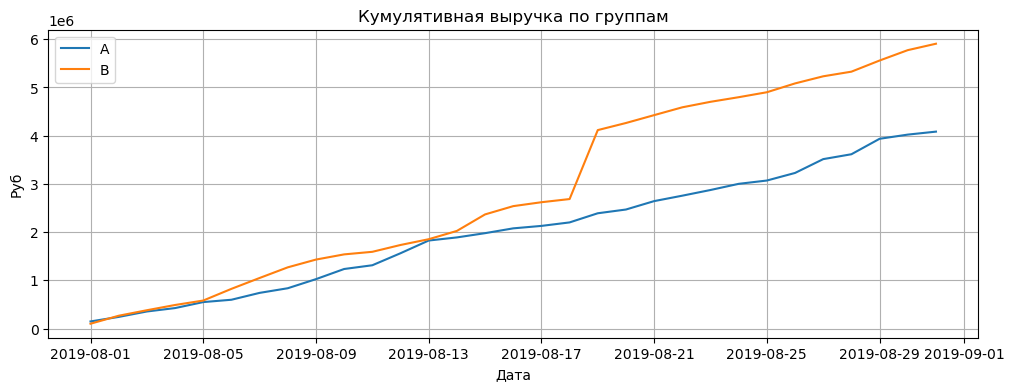

In [16]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12,4))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Руб')
plt.grid()
plt.legend()

Выручка почти равномерно увеличивается в течение всего теста. Однако график выручки в группе B имеет всплеск 19.08.21, что может сигнализировать о всплеске числа заказов либо о появлении очень дорогих заказов в выборке. За счет этого всплеска группа B с 19.08 становится значительно лучше по накпопленным показателям, чем группа A.

### Кумулятивный средний чек по группам

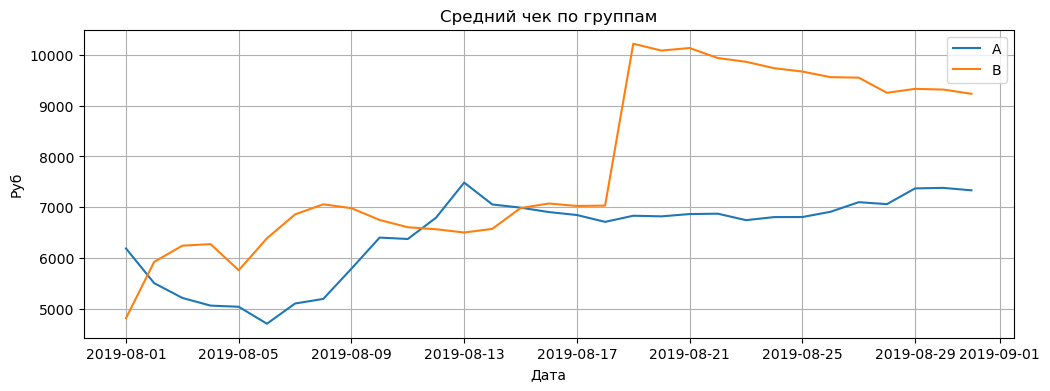

In [17]:
plt.figure(figsize=(12,4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('Средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Руб')
plt.grid()
plt.legend()

В группу B, вероятно, попали крупные заказы 19.08, что отразилось на сумме среднего чека. Для группы А средний чек установился к концу теста.
Необходимо будет проанализировать выбросы, так как они могут оказывать влияние на результат.

### Относительное  изменение кумулятивного среднего чека группы B к группе A

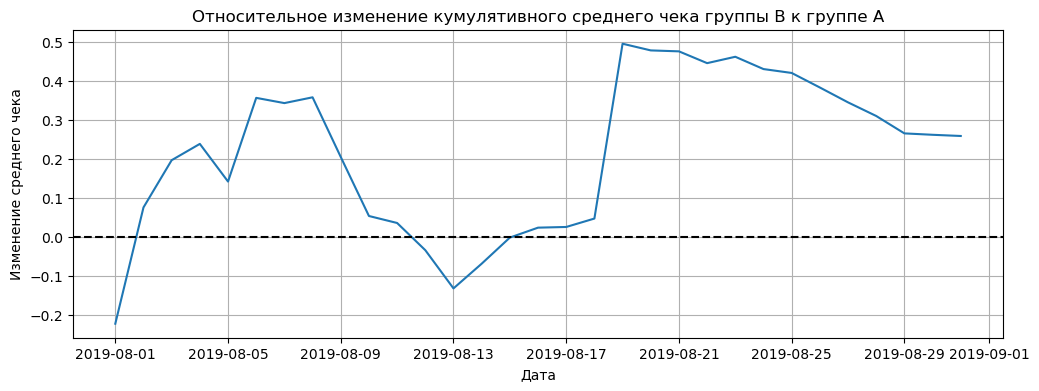

In [18]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date',\
                                                   right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(12,4))
plt.plot(mergedCumulativeRevenue['date'],(mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])\
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.grid()
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Изменение среднего чека')

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

В нескольких точках график различия между сегментами резко «скачет». Еще раз убеждаемся, что в данных имеются крупные заказы и выбросы.

### Кумулятивное среднее количество заказов на посетителя по группам

(18109.0, 18140.0, 0.02, 0.05)

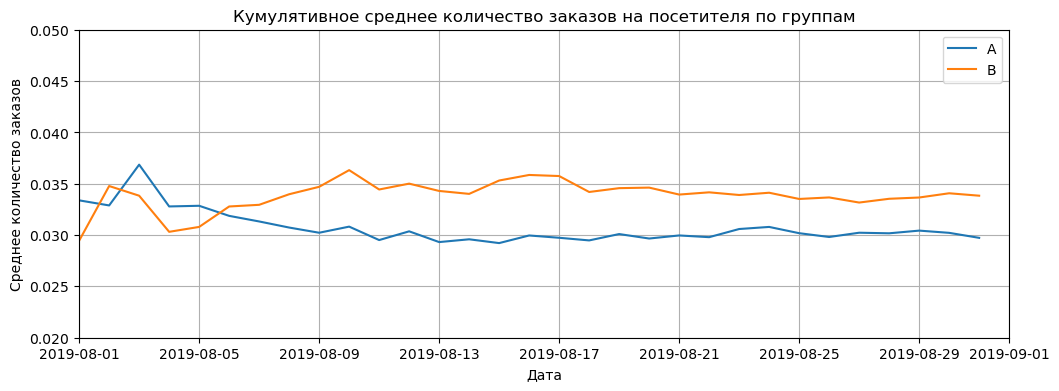

In [19]:
# считаем кумулятивное среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(12,4))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.grid()
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов')
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.02, 0.05])

В начале теста идет некоторое колебание, но затем показатель для группы B вырвался вперёд и зафиксировался, а для группы A зафиксировался на более низком уровне.

### Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A

(18109.0, 18140.0, -0.4, 0.4)

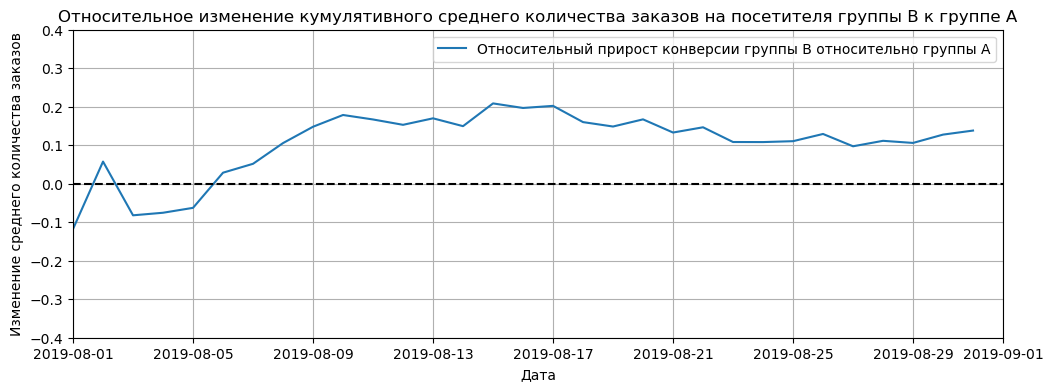

In [20]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']],\
                                                    left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12,4))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']\
     /mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Изменение среднего количества заказов')
plt.legend()
plt.grid()
plt.axhline(y=0, color='black', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.4, 0.4])

В начале теста идет некоторое колебание, но затем группа B вырвалась вперёд. 

В целом, выводы делать рано, так как сперва стоит проанализировать аномалии, которые могут оказывать существенное влияние на результат.

### Определение аномальных пользователей

#### Количество заказов по пользователям

In [21]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['visitor_id', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

      visitor_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


Есть пользователи, которые совершали очень много заказов (5, 8, 9, 11).

Text(0, 0.5, 'Количество заказов')

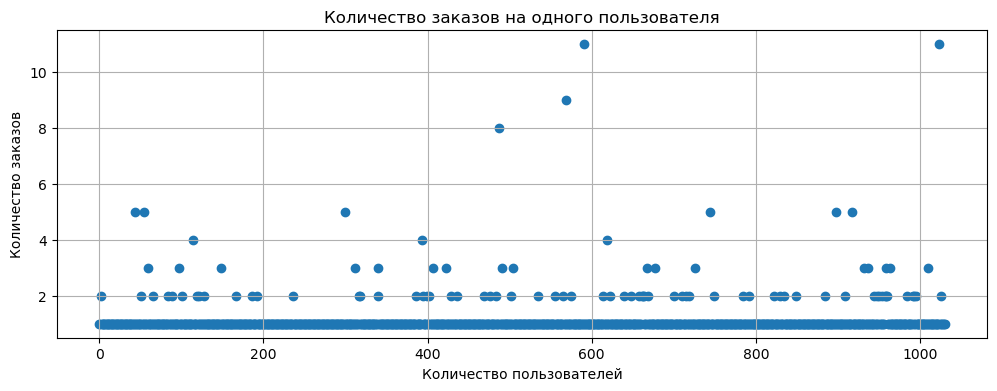

In [22]:
# Точечная диаграмма числа заказов на одного пользователя
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(12,4))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.grid()
plt.title('Количество заказов на одного пользователя')


plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')

Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-3 заказами тоже значительна. 

In [23]:
#95-й и 99-й перцентили количества заказов на пользователя
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей оформляли больше, чем 2 заказа. 99% пользователей совершают до 4х заказов.
Выберем 2 заказа на одного пользователя за верхнюю границу числа заказов. Пользователей, совершивших более трех заказов, будем считать аномальными.

#### Стоимость заказов

Text(0, 0.5, 'Руб')

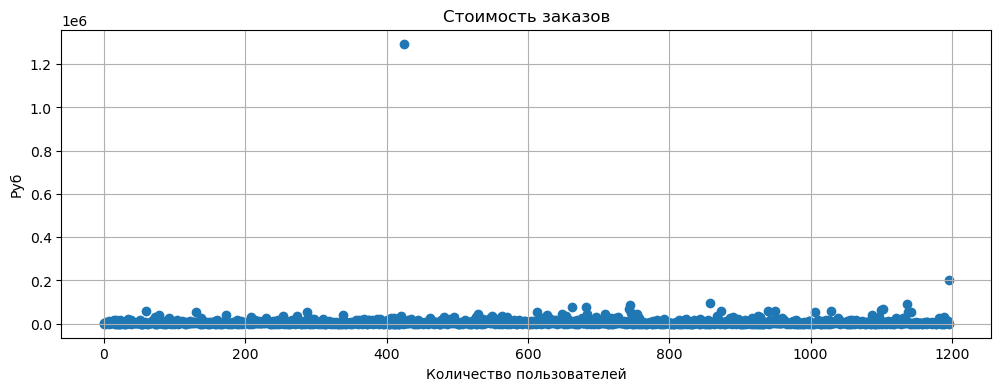

In [24]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(12,4))
plt.scatter(x_values, orders['revenue']) 
plt.grid()
plt.title('Стоимость заказов')
plt.xlabel('Количество пользователей')
plt.ylabel('Руб')

Чтобы график стал наглядным, уберем два выброса, которые портят всю картину (заказы стоимостью выше 190000 руб).

Text(0, 0.5, 'Руб')

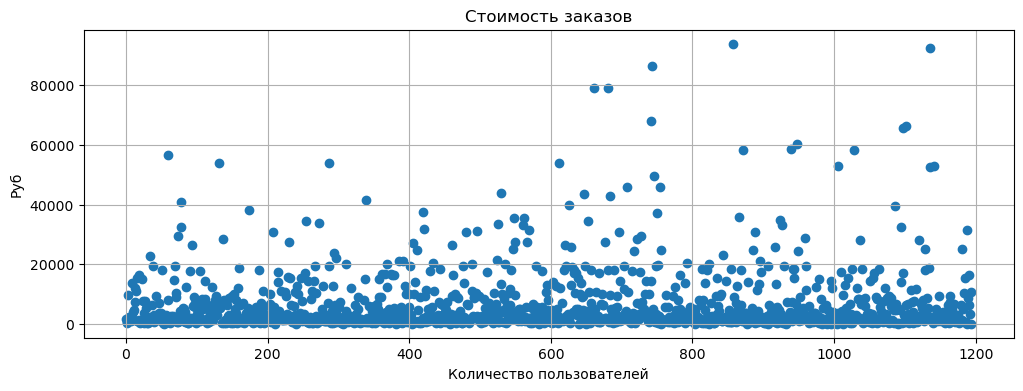

In [25]:
x_values = pd.Series(range(0,len(orders[orders['revenue'] < 190000]['revenue'])))
plt.figure(figsize=(12,4))
plt.scatter(x_values, orders[orders['revenue'] < 190000]['revenue']) 
plt.grid()
plt.title('Стоимость заказов')
plt.xlabel('Количество пользователей')
plt.ylabel('Руб')

Большая часть заказов укладывается в 20000 руб.

In [26]:
#95-й и 99-й перцентили стоимости заказов
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% заказов имеют стоимость выше 28000 руб. 99% заказов укладываются в 58233.2 руб.
Аномальными заказами будем считать заказы стоимостью свыше 30000 руб (укладывается в 1-5% заказов с наибольшей стоимостью).
Примем за аномальных пользователей тех, кто совершил эти аномальные заказы.

### Расчет статистической значимости по «сырым» данным

Предварительно подготовим данные, создав большую таблицу data со всеми данными по заказам и посещениям.

In [27]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Создадим переменные ordersByUsersA и ordersByUsersB со столбцами `visitor_id`, `orders`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [28]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders'] 

Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [29]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() -\
                                                            len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - \
                                                            len(ordersByUsersB['orders'])), name='orders')],axis=0)

#### Статистическая значимость различий  в среднем количестве заказов на посетителя между группами

**Уровень статистической значимости = 0.05**

**Нулевая гипотеза:**
- H0 - различий в среднем количестве заказов между группами нет.

**Альтернативная двухсторонняя гипотеза:**
- Н1 - различия в среднем количестве заказов между группами есть.

In [30]:
print('p-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный прирост среднего числа заказов группы B:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.017
Относительный прирост среднего числа заказов группы B: 0.138


**Вывод**

Отвергаем нулевую гипотезу, так как p-value меньше 0.05. Есть все основания говорить о том, что по «сырым» данным в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост группы B достигает почти 14%.

#### Статистическая значимость различий в среднем чеке заказа между группами

**Уровень статистической значимости = 0.05**

**Нулевая гипотеза:**
- H0 - различий в среднем чеке между группами нет.

**Альтернативная двухсторонняя гипотеза:**
- Н1 - различия в среднем чеке между группами есть.

In [31]:
print('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], \
                                                      orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост в среднем чеке группы B:', '{0:.3f}'\
      .format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.729
Относительный прирост в среднем чеке группы B: 0.259


**Вывод**

Нет причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, так как P-value больше 0.05. 

Средний чек для группы B статистически значимо не отличается от среднего чека для группы А.

### Расчет статистической значимости по «очищенным» данным

In [32]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 95)]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 95)]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitor_id, dtype: int64
74


Таким образом, у нас получилось 74 аномальных пользователя. Исключаем их из расчета, чтобы узнать, как их действия повлияли на результаты теста.

In [33]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#### Статистическая значимость различий  в среднем количестве заказов на посетителя между группами

**Уровень статистической значимости = 0.05**

**Нулевая гипотеза:**
- H0 - различий в среднем количестве заказов между группами нет.

**Альтернативная двухсторонняя гипотеза:**
- Н1 - различия в среднем количестве заказов между группами есть.

In [34]:
print('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост среднего числа заказов группы B:','{0:.3f}'\
      .format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.013
Относительный прирост среднего числа заказов группы B: 0.173


**Вывод**

Результаты по среднему количеству заказов практически не изменились: отвергаем нулевую гипотезу, так как p-value меньше 0.05. Есть все основания говорить о том, что по «очищенным» данным в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост группы B достигает 17%.

#### Статистическая значимость различий в среднем чеке заказа между группами

**Уровень статистической значимости = 0.05**

**Нулевая гипотеза:**
- H0 - различий в среднем чеке между группами нет.

**Альтернативная двухсторонняя гипотеза:**
- Н1 - различия в среднем чеке между группами есть.

In [35]:
print('p-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительный прирост в среднем чеке группы B:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.738
Относительный прирост в среднем чеке группы B: -0.020


**Вывод**

Как и в случае с «сырыми» данными, нет причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, так как p-value больше 0.05. 

Средний чек для группы B статистически значимо не отличается от среднего чека для группы А.

### Общие выводы

**Предварительно была выполнена предобработка данных:**

- Скорректированы названия столбцов.

- Приведены к типу даты столбцы с датами.


**Проведен A/B-тест и проанализированы результаты:**

- На основании построенных графиков кумулятивной выручки и кумулятивного среднего чека по группам сделан вывод о наличии всплеска числа заказов и/или очень дорогих заказов в выборке.

- График кумулятивного среднего количества заказов на посетителя по группам показывает стабильный результат во второй половине теста (данный показатель для группы B зафиксировался на более высоком уровне, чем для группы A). Тест можно остановить.

- Определено 74 аномальных пользователя. Посчитана статистическая значимость по «сырым» и по «очищенным» данным.

- Есть все основания говорить о том, что и по «сырым», и по «очищенным» данным в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост группы B по «очищенным» данным достигает 17%. Можно зафиксировать победу группы B. 

- Нет причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия. Можно говорить о том, что средний чек для группы B статистически значимо не отличается от среднего чека для группы А. Поэтому ничего страшного, что в группе B относительный прирост в среднем чеке меньше, чем в группе А:

**Рекомендации:**

- На основании вышеизложенных выводов рекомендуется остановить тест и зафиксировать победу группы B.